In [1]:
# For importing the UCI dataset
!pip install ucimlrepo

In [1]:
# Importing necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns

In [2]:
# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes) 
X = adult.data.features 
Y = adult.data.targets

In [3]:
# metadata 
print(adult.metadata)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [4]:
# variable information 
print(adult.variables)

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

In [5]:
print(X)

       age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2              

In [6]:
print(Y)

       income
0       <=50K
1       <=50K
2       <=50K
3       <=50K
4       <=50K
...       ...
48837  <=50K.
48838  <=50K.
48839  <=50K.
48840  <=50K.
48841   >50K.

[48842 rows x 1 columns]


In [7]:
# Combine it into a dataframe

df = pd.DataFrame(data=X, columns=adult.data.feature_names)
df['income'] = Y

In [8]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
# Information about the cell types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Find the missing values denoted as "?"

In [10]:
for i in df.columns:
    print("Column : ", i, ", Missing Values : ", df.loc[df[i] == "?", i].size)

df['income'].value_counts()

Column :  age , Missing Values :  0
Column :  workclass , Missing Values :  1836
Column :  fnlwgt , Missing Values :  0
Column :  education , Missing Values :  0
Column :  education-num , Missing Values :  0
Column :  marital-status , Missing Values :  0
Column :  occupation , Missing Values :  1843
Column :  relationship , Missing Values :  0
Column :  race , Missing Values :  0
Column :  sex , Missing Values :  0
Column :  capital-gain , Missing Values :  0
Column :  capital-loss , Missing Values :  0
Column :  hours-per-week , Missing Values :  0
Column :  native-country , Missing Values :  583
Column :  income , Missing Values :  0


income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [11]:
df.replace({'income':{">50K.":">50K" , "<=50K.":"<=50K"}},inplace=True)

In [12]:
df['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

The columns 'workclass', 'occupation' and 'native-country' only has missing values

In [13]:
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

<Axes: xlabel='income', ylabel='count'>

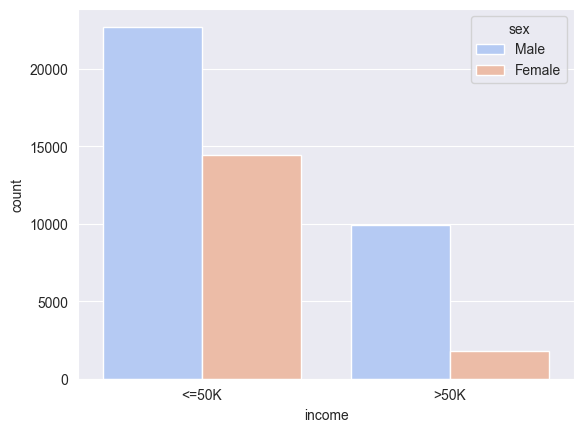

In [14]:
sns.countplot(x='income', data=df, hue='sex', palette='coolwarm')

In [15]:
Education_data=df['education'].value_counts()
order1= list(Education_data.index)

EducationNum_data=df['education-num'].value_counts()
order2= list(EducationNum_data.index)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3456\2004304161.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot1= sns.countplot(data=df, x='education', order=order1, palette ='coolwarm')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3456\2004304161.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot2= sns.countplot(data=df, x='education-num', order=order2, palette = 'coolwarm')


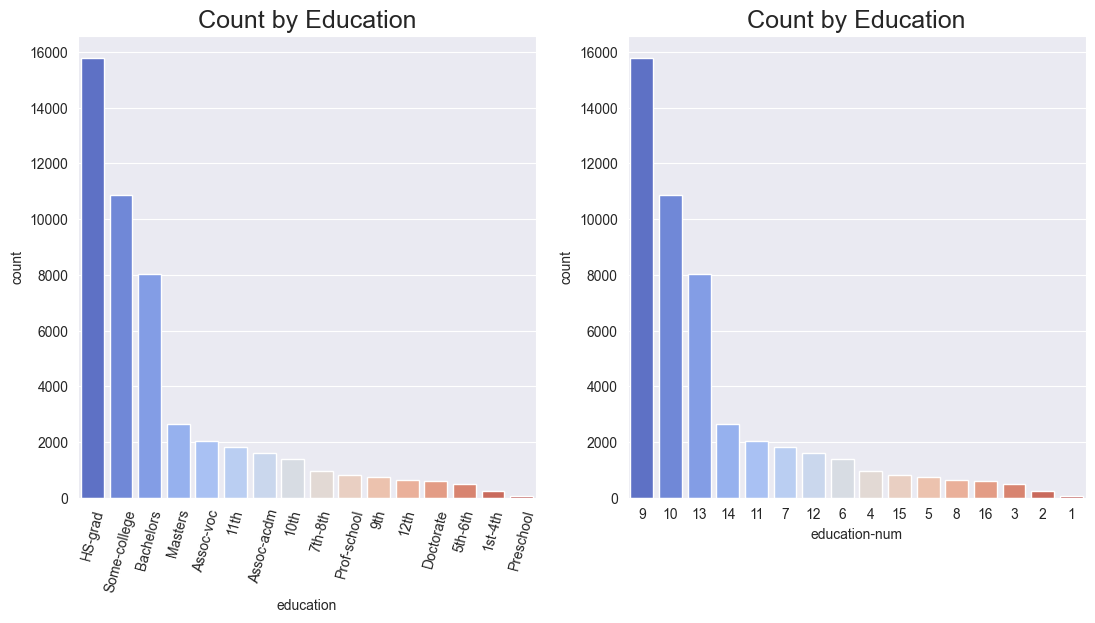

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,6))

# Plot the count bar plot
plt.subplot(1,2,1)
plot1= sns.countplot(data=df, x='education', order=order1, palette ='coolwarm')
plt.title('Count by Education', fontsize=18)
plt.xticks(rotation=75);

plt.subplot(1,2,2)
plot2= sns.countplot(data=df, x='education-num', order=order2, palette = 'coolwarm')
plt.title('Count by Education', fontsize=18);

Education and Education-num columns are correlated

In [17]:
df.drop('education', axis=1, inplace=True)

In [18]:
df['capital-gain'].value_counts()

capital-gain
0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
22040        1
2387         1
1639         1
1111         1
6612         1
Name: count, Length: 123, dtype: int64

In [19]:
df['capital-loss'].value_counts()

capital-loss
0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
1870        1
1911        1
2465        1
1421        1
Name: count, Length: 99, dtype: int64

Both capital gain and capital loss hava value 0 for more than 90%

In [20]:
df.drop('capital-loss', axis=1, inplace=True)

In [21]:
df.drop('capital-gain', axis=1, inplace=True)

In [22]:
df['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

The column native-country has more than 95% entries from the United States. Therefore, it is unnecessary for the model

In [23]:
df.drop('native-country', axis=1, inplace=True)

Where occupation is missing, workclass is missing too

In [24]:
temp_df = df.loc[((df["occupation"] == "?") & (df["workclass"] == "?")), :]
len(temp_df)

1836

In [25]:
df_clean = df[df['workclass'] != "?"]
df_clean.head(100)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
99,32,Federal-gov,249409,9,Never-married,Other-service,Own-child,Black,Male,40,<=50K
100,76,Private,124191,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,>50K
101,44,Private,198282,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,60,>50K
102,47,Self-emp-not-inc,149116,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,<=50K


In [26]:
df_clean['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [27]:
df_clean = df[df['occupation'] != "?"]
df_clean['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [28]:
# df_extra_col = df.copy()
# df_extra_col.loc[df_extra_col["workclass"] == "?", "workclass.missing"] = 1
# df_extra_col.loc[df_extra_col["workclass"] != "?", "workclass.missing"] = 0
# 
# df_extra_col.head(100)

In [29]:
# Check for missing values in the dataset
if df_clean.isnull().values.any():
    print("There are missing values in the dataset")
else:
    print("No missing values in the dataset")

There are missing values in the dataset


In [30]:
# Missing values
df_clean.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64

In [31]:
df_clean.head(100)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
99,32,Federal-gov,249409,9,Never-married,Other-service,Own-child,Black,Male,40,<=50K
100,76,Private,124191,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,>50K
101,44,Private,198282,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,60,>50K
102,47,Self-emp-not-inc,149116,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,<=50K


In [32]:
df_clean['workclass'].isnull().sum()

963

In [33]:
df_clean.dropna(inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3456\3672730446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.dropna(inplace=True)


In [34]:
if df_clean.isnull().values.any():
    print("There are missing values in the dataset")
else:
    print("No missing values in the dataset")

No missing values in the dataset


In [35]:
df_clean.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K


In [36]:
label_encoder = LabelEncoder()
df_clean['income'] = label_encoder.fit_transform(df_clean['income'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3456\3588909158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['income'] = label_encoder.fit_transform(df_clean['income'])


In [37]:
# Fill missing numerical values with the mean
imputer = SimpleImputer(strategy='mean')
df_clean[['age', 'income', 'fnlwgt', 'education-num', 'hours-per-week']] = imputer.fit_transform(df_clean[['age', 'income', 'fnlwgt', 'education-num', 'hours-per-week']])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3456\2401718404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[['age', 'income', 'fnlwgt', 'education-num', 'hours-per-week']] = imputer.fit_transform(df_clean[['age', 'income', 'fnlwgt', 'education-num', 'hours-per-week']])


In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46033 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46033 non-null  float64
 1   workclass       46033 non-null  object 
 2   fnlwgt          46033 non-null  float64
 3   education-num   46033 non-null  float64
 4   marital-status  46033 non-null  object 
 5   occupation      46033 non-null  object 
 6   relationship    46033 non-null  object 
 7   race            46033 non-null  object 
 8   sex             46033 non-null  object 
 9   hours-per-week  46033 non-null  float64
 10  income          46033 non-null  float64
dtypes: float64(5), object(6)
memory usage: 4.2+ MB


In [39]:
categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
labEnc = LabelEncoder()
for col in categorical_cols:
  df_clean[col] = labEnc.fit_transform(df_clean[col])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3456\1427612544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = labEnc.fit_transform(df_clean[col])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3456\1427612544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = labEnc.fit_transform(df_clean[col])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3456\1427612544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Validate Data

Replace missing values with the mode of the column

In [40]:
# mode_workclass = df['workclass'].mode()[0]
# print(f"The mode of 'workclass' is: {mode_workclass}")

In [41]:
# df['workclass'] = df['workclass'].replace('?', mode_workclass)

In [42]:
# mode_occupation = df['occupation'].mode()[0]
# print(f"The mode of 'occupation' is: {mode_occupation}")

In [43]:
# df['occupation'] = df['occupation'].replace('?', mode_occupation)

In [44]:
# mode_ntv_country = df['native-country'].mode()[0]
# print(f"The mode of 'native-country' is: {mode_ntv_country}")

In [45]:
# mode_ntv_country = df['native-country'].mode()[0]
# print(f"The mode of 'native-country' is: {mode_ntv_country}")

In [46]:
# check for missing values in the dataset
if df_clean.isnull().values.any():
    print("There are missing values in the dataset.")
else:
    print("No missing values in the dataset.")

No missing values in the dataset.


In [47]:
df_clean.describe()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income
count,46033.000000,46033.000000,4.603300e+04,46033.000000,46033.000000,46033.000000,46033.000000,46033.000000,46033.000000,46033.000000,46033.000000
mean,38.556601,2.205201,1.898051e+05,10.128929,2.587796,5.979080,1.411965,3.672061,0.675906,40.948407,0.248126
std,13.204268,0.957854,1.054747e+05,2.564064,1.497996,4.023434,1.597293,0.841747,0.468040,12.011069,0.431930
min,17.000000,0.000000,1.349200e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.000000,1.176060e+05,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,40.000000,0.000000
50%,37.000000,2.000000,1.783530e+05,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,40.000000,0.000000
75%,47.000000,2.000000,2.378650e+05,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,45.000000,0.000000
max,90.000000,6.000000,1.490400e+06,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99.000000,1.000000


Drop duplicated values

In [48]:
df_clean.duplicated().sum()

61

In [49]:
df_clean.drop_duplicates(inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3456\291987672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop_duplicates(inplace=True)


In [50]:
df_clean.duplicated().sum()

0

# Principal Component Analysis

In [51]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_clean.drop(columns=['income']))

PCA()

In [52]:
import numpy as np

# Get the cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

num_components = np.argmax(cumulative_variance >= 0.95) + 1

print("Number of components to capture 95% of variance:", num_components)

Number of components to capture 95% of variance: 1


Variance Ratio

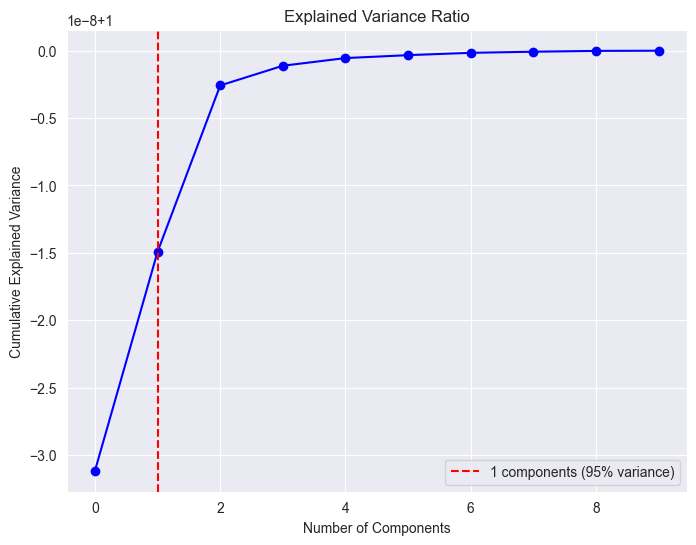

In [53]:
import matplotlib.pyplot as plt

# Visualize explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.axvline(x=num_components, color='r', linestyle='--', label=f'{num_components} components (95% variance)')
plt.legend()
plt.grid(True)
plt.show()

Correlation Matrix

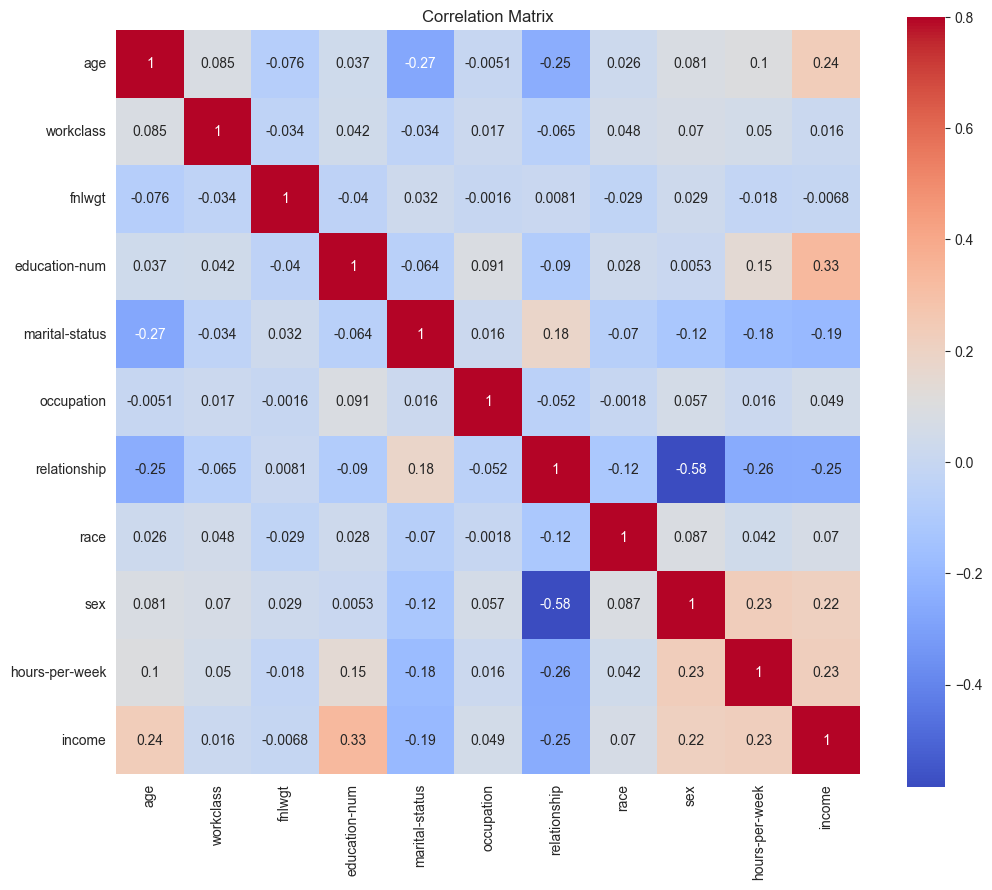

In [54]:
import seaborn as sns

# Visualize correlation matrix
correlation = df_clean.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, vmax=0.8, square=True, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Split Data into Features and Target

In [55]:
original_income = df_clean['income']

In [56]:
x = df_clean.drop('income', axis=1)  # Features
y = df_clean['income']  # Target variable (income)

# Data Testing and Training Split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Random Forest Classification

In [58]:
rnd_forest = RandomForestClassifier()
rnd_forest.fit(x_train, y_train)

RandomForestClassifier()

Model training

In [59]:
rnd_forest_pred = rnd_forest.predict(x_test)

In [60]:
rf_accuracy = accuracy_score(y_test, rnd_forest_pred)
rf_report = classification_report(y_test, rnd_forest_pred)

Accuracy Metrics

In [61]:
print("Random Forest Classifier Accuracy:", rf_accuracy)

Random Forest Classifier Accuracy: 0.819032082653616


In [62]:
print("Random Forest Classifier Report:\n", rf_report)

Random Forest Classifier Report:
               precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      6931
         1.0       0.65      0.56      0.61      2264

    accuracy                           0.82      9195
   macro avg       0.76      0.73      0.74      9195
weighted avg       0.81      0.82      0.81      9195


In [63]:
rnd_forest_pred_df = pd.DataFrame({'income' : rnd_forest_pred})

In [64]:
print(rnd_forest_pred_df["income"].value_counts())

income
0.0    7241
1.0    1954
Name: count, dtype: int64


In [65]:
df_clean['income'].value_counts()

income
0.0    34558
1.0    11414
Name: count, dtype: int64

In [66]:
accuracy = accuracy_score(y_test, rnd_forest_pred)
print("Accuracy of the Random Forest Classifier:", accuracy)

Accuracy of the Random Forest Classifier: 0.819032082653616


In [67]:
# Threshold for income classification
threshold = 0.5  # Assuming predictions are probabilities, we'll use 0.5 as the threshold

# Convert predicted probabilities to binary predictions based on the threshold
binary_predictions = (rnd_forest_pred > threshold).astype(int)

# Create a DataFrame for binary predictions
binary_predictions_df = pd.DataFrame({'income': binary_predictions})

# Count the number of individuals predicted to earn more than $50k per annum
print("Number of individuals predicted to earn more than $50k per annum:", binary_predictions_df['income'].sum())

Number of individuals predicted to earn more than $50k per annum: 1954


# Naive Bayes Classification

In [68]:
naive_bayes_classification = GaussianNB()
naive_bayes_classification.fit(x_train, y_train)

GaussianNB()

In [69]:
nb_pred = naive_bayes_classification.predict(x_test)

In [70]:
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_report = classification_report(y_test, nb_pred)

In [71]:
print("Naive Bayes Classifier Accuracy:", nb_accuracy)

Naive Bayes Classifier Accuracy: 0.7828167482327352


In [72]:
print("Naive Bayes Classifier Report:\n", nb_report)

Naive Bayes Classifier Report:
               precision    recall  f1-score   support

         0.0       0.79      0.96      0.87      6931
         1.0       0.67      0.23      0.35      2264

    accuracy                           0.78      9195
   macro avg       0.73      0.60      0.61      9195
weighted avg       0.76      0.78      0.74      9195


In [73]:
# Threshold for income classification
threshold = 0.5

binary_predictions2 = (nb_pred > threshold).astype(int)

binary_predictions2_df = pd.DataFrame({'income': binary_predictions2})

print("Number of individuals predicted to earn more than $50k per annum:", binary_predictions2_df['income'].sum())

Number of individuals predicted to earn more than $50k per annum: 791


# Area Under the ROC curve

In [74]:
# from sklearn.metrics import roc_auc_score
# 
# # Compute the probabilities for each class
# rnd_forest_pred_prob = rnd_forest.predict_proba(x_test)
# 
# # Compute the ROC AUC score using the OvR strategy
# rnd_forest_auc_roc = roc_auc_score(y_test, rnd_forest_pred_prob, multi_class='ovr')
# 
# print("Random Forest Classifier Metrics:")
# print("Accuracy:", rf_accuracy)
# print("Classification Report:\n", rf_report)
# print("AUC-ROC Score:", rnd_forest_auc_roc)

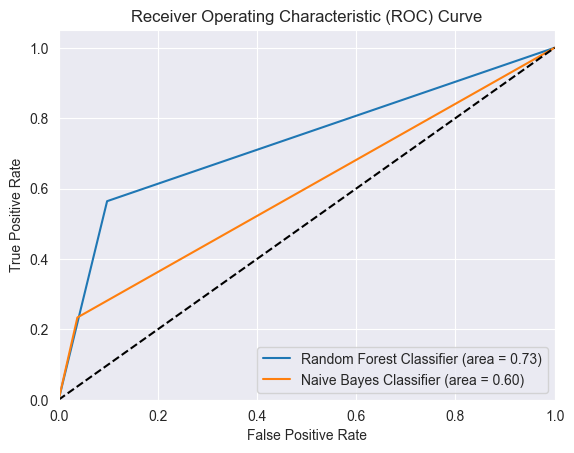

In [80]:
from sklearn.metrics import roc_curve, auc

# Random Forest Classifier
rf_fpr, rf_tpr, _ = roc_curve(y_test, rnd_forest_pred)
rf_roc_auc = auc(rf_fpr, rf_tpr)

# Naive Bayes Classifier
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_pred)
nb_roc_auc = auc(nb_fpr, nb_tpr)

# Plot ROC curves
import matplotlib.pyplot as plt
plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes Classifier (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [113]:
from sklearn.metrics import roc_auc_score

rnd_forest_pred_prob = rnd_forest.predict_proba(x_test)

# Compute the ROC AUC score for each class separately
rnd_forest_auc_roc = roc_auc_score(y_test, rnd_forest_pred_prob, multi_class='ovr', average='macro')

print("Random Forest Classifier Metrics:")
print("Accuracy:", rf_accuracy)
print("Classification Report:\n", rf_report)
print("AUC-ROC Score:", rnd_forest_auc_roc)

ValueError: y should be a 1d array, got an array of shape (9195, 2) instead.

In [118]:
y_test = y_test[0]

IndexError: invalid index to scalar variable.

In [117]:
# Compute the probabilities for each class
naive_bayes_pred_prob = naive_bayes_classification.predict_proba(x_test)

# Compute the ROC AUC score using the OvR strategy
naive_bayes_auc_roc = roc_auc_score(y_test, naive_bayes_pred_prob, multi_class='ovr')

print("Naive Bayes Classifier Metrics:")
print("Accuracy:", nb_accuracy)
print("Classification Report:\n", nb_report)
print("AUC-ROC Score:", naive_bayes_auc_roc)

InvalidParameterError: The 'y_true' parameter of roc_auc_score must be an array-like. Got 0.0 instead.